In [90]:
# Lets get our data from fbref
import pandas as pd

url = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={'id': 'stats_standard'})[0]

In [91]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2     Rodrigo Abajas             es ESP                 DF   
2                  3     James Abankwah             ie IRL              DF,MF   
3                  4  Keyliane Abdallah             fr FRA                 FW   
4                  5   Yunis Abdelhamid             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             25-012   
1           Valencia          es La Liga             21-249   
2            Udinese          it Serie A             21-000   
3          Marseille          fr Ligue 1             18-286   
4      Saint-Étienne          fr Ligue 1             37-110   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000            3      1  ...           0.00  0.00  0.00   
1               2003            1      1  ...           0.00  0.00  0.00   
2               2004            6      0  ...           0.00  0.00  0.00   
3               2006            1      0  ...           0.00  0.00  0.00   
4               1987           11     11  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
1   0.00  0.10  0.00   0.10  0.10     0.10             Matches  
2   0.00  0.06  0.00   0.06  0.06     0.06             Matches  
3   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
4   0.00  0.02  0.00   0.03  0.02     0.03             Matches  

[5 rows x 38 columns]

In [92]:
# We'll get rid of the per 90 columns and we will recalculate the ones we are interested in
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]

In [93]:
# This will get rid of the first level of the multiindex on the columns
df = df.droplevel(0, axis=1)

In [94]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25-012,2000,3,1,...,0,0,0.0,0.0,0.0,0.0,1,8,3,Matches
1,2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21-249,2003,1,1,...,1,0,0.1,0.1,0.0,0.1,3,2,3,Matches
2,3,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,21-000,2004,6,0,...,1,0,0.1,0.1,0.0,0.1,3,4,1,Matches
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-286,2006,1,0,...,0,0,0.0,0.0,0.0,0.0,1,0,0,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,fr Ligue 1,37-110,1987,11,11,...,2,0,0.2,0.2,0.0,0.3,4,22,3,Matches


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rk        2562 non-null   object
 1   Player    2562 non-null   object
 2   Nation    2560 non-null   object
 3   Pos       2562 non-null   object
 4   Squad     2562 non-null   object
 5   Comp      2562 non-null   object
 6   Age       2559 non-null   object
 7   Born      2559 non-null   object
 8   MP        2562 non-null   object
 9   Starts    2562 non-null   object
 10  Min       2562 non-null   object
 11  90s       2562 non-null   object
 12  Gls       2562 non-null   object
 13  Ast       2562 non-null   object
 14  G+A       2562 non-null   object
 15  G-PK      2562 non-null   object
 16  PK        2562 non-null   object
 17  PKatt     2562 non-null   object
 18  CrdY      2562 non-null   object
 19  CrdR      2562 non-null   object
 20  xG        2561 non-null   object
 21  npxG      2561

In [96]:
# Now let's calculate the percentiles for each player in the columns we're interested in
# We can calculate the percentiles using the .rank() method

# Let's look at the columns we are interested in
df[['90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR']].head(10)

# let's also make sure that the columns are of the correct type
df[['90s', 'xG', 'xAG']] = df[['90s', 'xG', 'xAG']].apply(pd.to_numeric, errors='coerce')
df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']].apply(pd.to_numeric, errors='coerce')

In [97]:
# Now let's calculate the per 90 stats for each of these columns
# But we will name them as we want to see them in the radar plot
df['goals_per_90'] = df['Gls'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['goals_assists_per_90'] = df['G+A'] / df['90s']
df['expected_goals_per_90'] = df['xG'] / df['90s']
df['expected_assists_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [98]:
# We'll calculate the percentiles for each of these columns
# We will also name them as we want to see them in the radar plot
df['Goals'] = (df['goals_per_90'].rank(pct=True) * 100).fillna(0).astype(int)
df['Assists'] = (df['assists_per_90'].rank(pct=True) * 100).fillna(0).astype(int)
df['Goals + Assists'] = (df['goals_assists_per_90'].rank(pct=True) * 100).fillna(0).astype(int)
df['Expected Goals'] = (df['expected_goals_per_90'].rank(pct=True)  * 100).fillna(0).astype(int)
df['Expected Assists'] = (df['expected_assists_per_90'].rank(pct=True) * 100).fillna(0).astype(int)
df['Progressive Carries'] = (df['progressive_carries_per_90'].rank(pct=True) * 100).fillna(0).astype(int)
df['Progressive Passes'] = (df['progressive_passes_per_90'].rank(pct=True) * 100).fillna(0).astype(int)
df['Progressive Receptions'] = (df['progressive_receptions_per_90'].rank(pct=True) * 100).fillna(0).astype(int)

In [99]:
from mplsoccer import Radar

In [100]:
# Let's plot a radar for Marmoush
omar = df[df['Player'] == 'Omar Marmoush']
omar

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
1462,1407,Omar Marmoush,eg EGY,FW,Eint Frankfurt,de Bundesliga,25-344,1999,17,17,...,3.10559,7.763975,98,98,99,95,97,93,48,85


In [101]:
columns_to_plot = [
    'Goals', 'Assists', 'Goals + Assists', 'Expected Goals', 
    'Expected Assists', 'Progressive Carries', 'Progressive Passes', 'Progressive Receptions'
]

# If there was a stat that meant having a lower value was better we can use the parameter
# lower_is_better to make the radar plot reflect that
# example: lower_is_better=['Goals Conceded']
# And then add that parameter to the Radar object

radar = Radar(
    # These are the columns we want to plot
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],# Since we are plotting percentiles the minimum value is 0
    max_range=[100 for _ in columns_to_plot], # The maximum value is the maximum percentile
    # lower_is_better=lower_is_better
)

Text(0, 0.05, 'Radar Plot @HazanSerifli ')

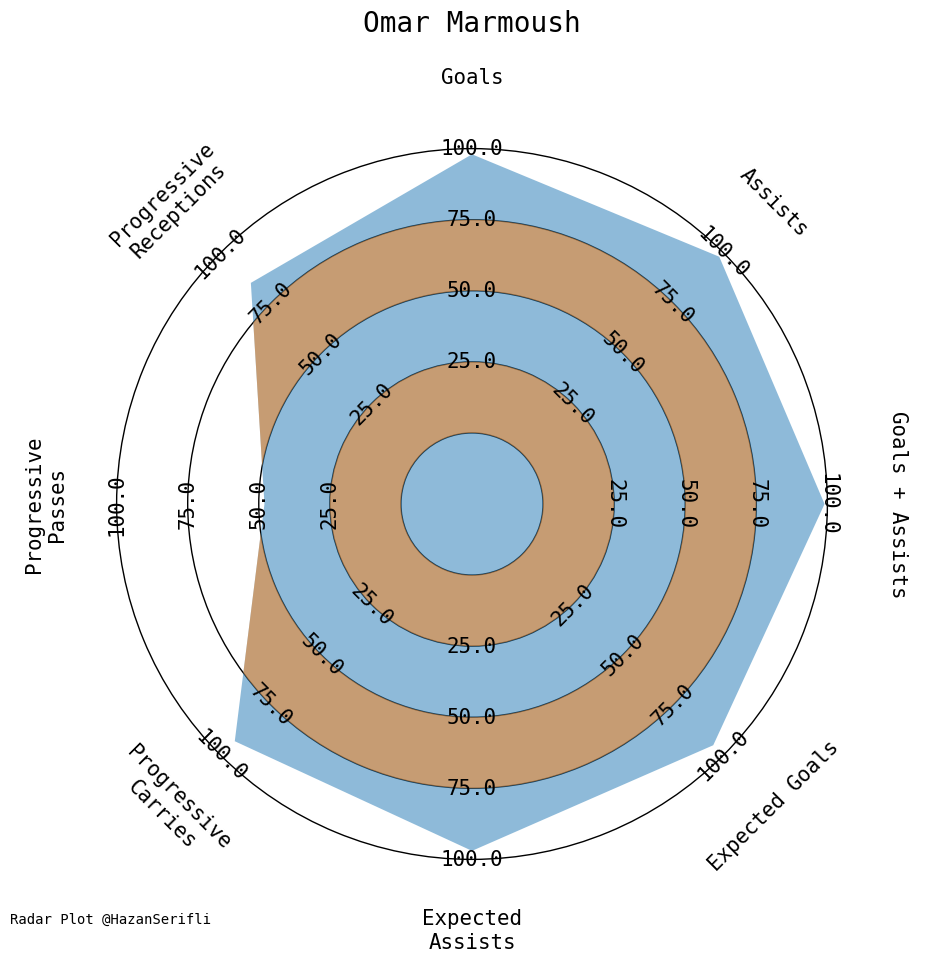

In [110]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar(
    ax=ax,
    values=omar[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#1f77b4', 'alpha': 0.5},  # Blue color with some transparency
    kwargs_rings={'facecolor': '#ff7f0e', 'alpha': 0.5}   # Orange color with some transparency
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)
# draw the range labels
param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.5, y=1.02, s='Omar Marmoush', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Radar Plot @HazanSerifli ', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [104]:
# Now let's compare two players
# We'll compare Mbappe and Haaland
haaland = df[df['Player'] == 'Erling Haaland']
haaland

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
979,943,Erling Haaland,no NOR,FW,Manchester City,eng Premier League,24-179,2000,21,21,...,0.669856,3.971292,97,61,95,98,56,28,12,56


Text(0, 0.05, 'Radar Plot @HazanSerifli')

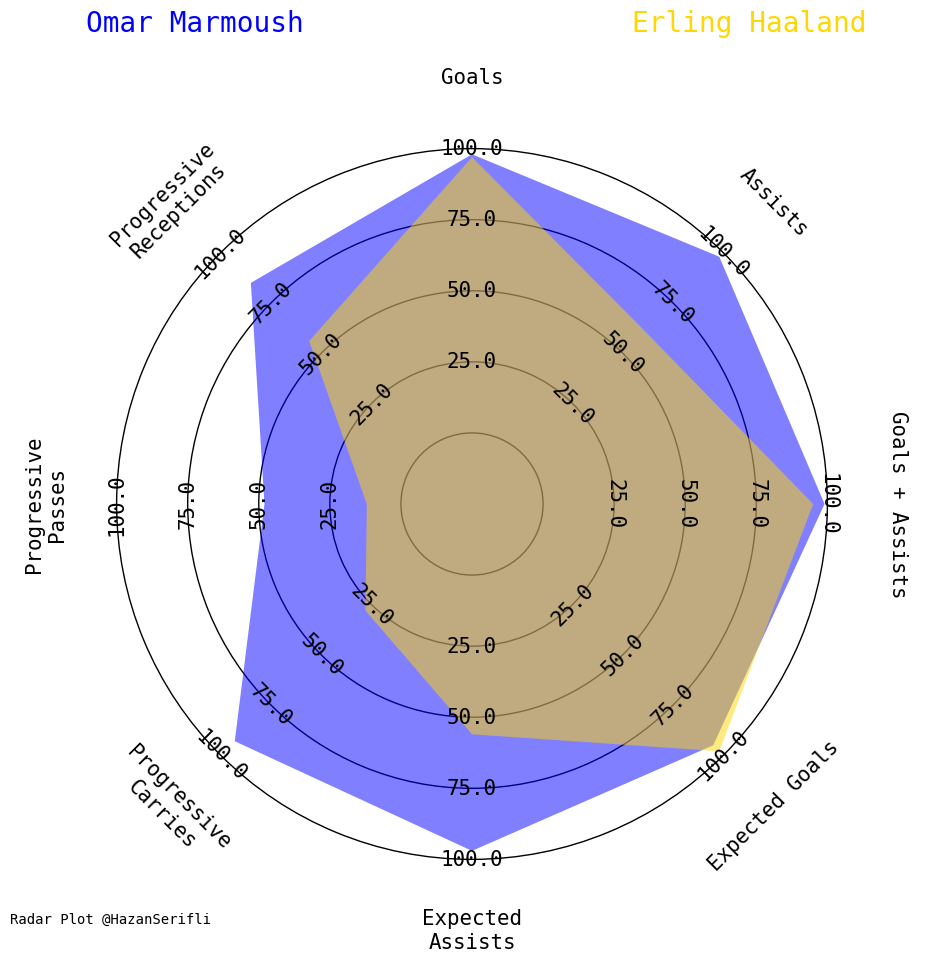

In [114]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar_compare(
    ax=ax,
    values=omar[columns_to_plot].values.flatten().tolist(),
    compare_values=haaland[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': 'blue', 'alpha': 0.5},  # Blue color
    kwargs_compare={'facecolor': 'gold', 'alpha': 0.5}  # Gold color
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)

param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.2, y=1.02, s='Omar Marmoush', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='blue'  # Blue color
)

ax.text(
    x=0.8, y=1.02, s='Erling Haaland', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='gold'  # Gold color
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Radar Plot @HazanSerifli', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [115]:
from mplsoccer import PyPizza


In [116]:
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#EFF0D1',
    straight_line_color='#000000',
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=0,
    other_circle_color='#000000',
    other_circle_ls='--'
)

Text(0.075, 0.005, 'data: fbref\n@HazanSerifli')

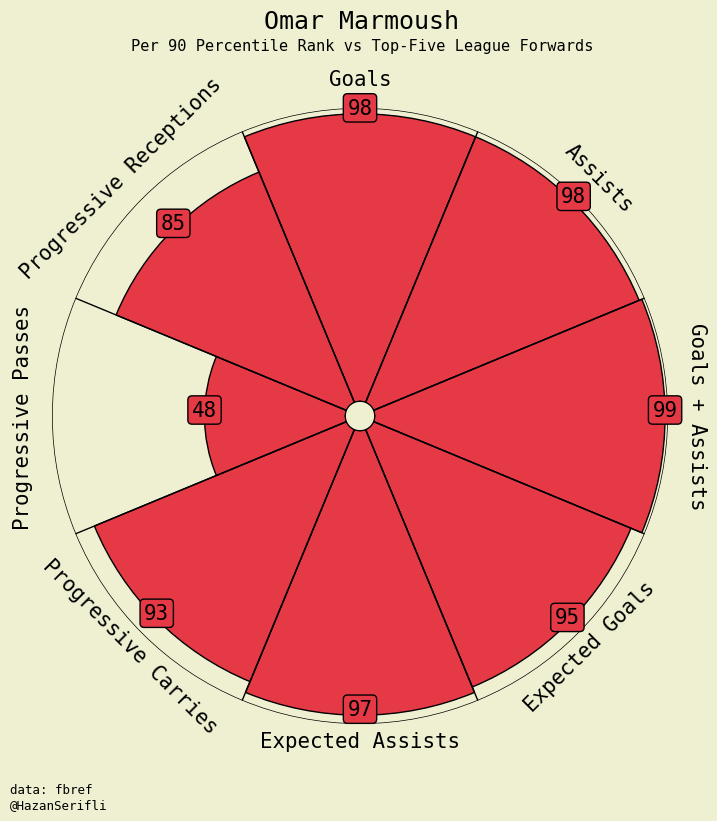

In [118]:
fig, ax = pizza.make_pizza(
    figsize=(8, 8),
    values=omar[columns_to_plot].values.flatten().tolist(),
    kwargs_slices=dict(
        facecolor='#e63946', edgecolor='#000000', linewidth=1
    ),
    kwargs_params=dict(
        color='#000000', fontsize=15, fontproperties="monospace"
    ),
    kwargs_values=dict(
        color='#000000', fontsize=15, fontproperties="monospace", 
        bbox = {
            "edgecolor": "#000000",
            "facecolor": "#e63946",
            "boxstyle": "round,pad=0.2",
            "lw": 1
        }
    )
)

# add title
fig.text(
    0.515, 0.98, "Omar Marmoush", size=18,
    ha="center", fontfamily="monospace", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.952,
    "Per 90 Percentile Rank vs Top-Five League Forwards",
    size=11,
    ha="center", fontfamily="monospace", color="#000000"
)

CREDIT_1 = "data: fbref"
CREDIT_2 = "@HazanSerifli"

fig.text(
    0.075, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontfamily="monospace", color="#000000",
    ha="left"
)

In [120]:
%pip install ridge_map

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 958.3 kB/s eta 0:00:001m718.0 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for SRTM.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105845 sha256=c5b0f1643c40a0ec7d3d561838fc98dd8b60921ae6c965ba7cb694dad4d7bc0a
  Stored in directory: /Users/hazanserifli/Library/Caches/pip/wheels/d5/ad/29/2ba12215172525f9e549fb7e548573776f4c29dd450e46ef50
Successfully built SRTM.py
Note: you may need to restart the kernel to use updated packages.


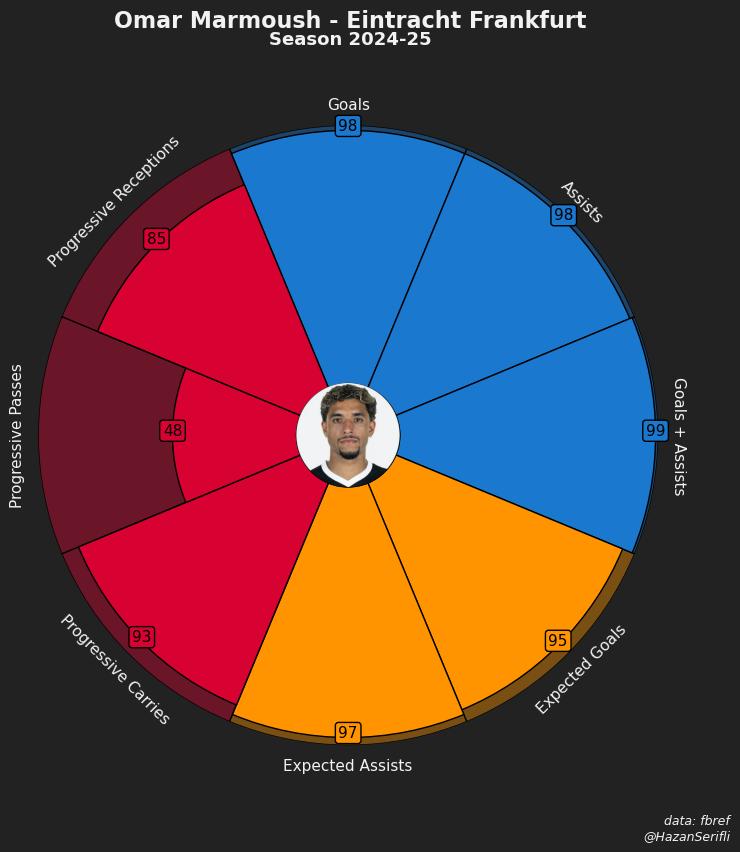

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, add_image
from matplotlib.font_manager import FontProperties

# Load a font if you need specific one, or use defaults.
font_normal = FontProperties()
font_bold = FontProperties(weight='bold')
font_italic = FontProperties(style='italic')

# Your params, values, etc. from the previous script.
params = [
    "Goals", "Assists", "Goals + Assists", "Expected Goals",
    "Expected Assists", "Progressive Carries", "Progressive Passes",
    "Progressive Receptions"
]

values = [98, 98, 99, 95, 97, 93, 48, 85]

slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 2 + ["#D70232"] * 3
text_colors = ["#000000"] * 8

baker = PyPizza(
    params=params,
    background_color="#222222",
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_color="#000000",
    last_circle_lw=1,
    other_circle_lw=0,
    inner_circle_size=20
)

fig, ax = baker.make_pizza(
    values,
    figsize=(8, 8.5),
    color_blank_space="same",
    slice_colors=slice_colors,
    value_colors=text_colors,
    value_bck_colors=slice_colors,
    blank_alpha=0.4,
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal, va="center"
    ),
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

fig.text(
    0.515, 0.975, "Omar Marmoush - Eintracht Frankfurt", size=16,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Season 2024-25",
    size=13,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

CREDIT_1 = "data: fbref"
CREDIT_2 = "@HazanSerifli"
fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic, color="#F2F2F2",
    ha="right"
)

# Add rectangles for categories
# Remove the rectangles for Attacking, Possession, Defending

from PIL import Image

# Load the image
omar_marmoush_image = Image.open('/Users/hazanserifli/Desktop/dfl-obj-002gb9-dfl-clu-00000f-dfl-sea-0001k8-circle.webp')

# Add image
ax_image = add_image(
    omar_marmoush_image, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127, interpolation='hanning'
)  # these values might differ when you are plotting

plt.show()
